In [132]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings                           
warnings.filterwarnings('ignore')
pwd = os.getcwd()

In [4]:
api_address = "https://api.covid19api.com/summary"

In [5]:
json_data = requests.get(api_address).json()

In [6]:
df = pd.json_normalize(json_data['Countries'])

In [7]:
df

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,6f87b16d-2c44-4ac8-82ef-b50483abff3b,Afghanistan,AF,afghanistan,0,155599,0,7230,0,0,2021-10-13T21:15:33.753Z
1,81904e08-21e9-46dd-8964-cb59f88e8da0,Albania,AL,albania,0,175664,0,2783,0,0,2021-10-13T21:15:33.753Z
2,347bc51e-20aa-4be4-801f-1bbcf007a689,Algeria,DZ,algeria,0,204790,0,5859,0,0,2021-10-13T21:15:33.753Z
3,c9a8edb1-5494-44e2-86d6-4ab3623379b9,Andorra,AD,andorra,0,15307,0,130,0,0,2021-10-13T21:15:33.753Z
4,1dc5e08b-5407-4098-915e-a9a80b4f3ff7,Angola,AO,angola,0,61794,0,1642,0,0,2021-10-13T21:15:33.753Z
...,...,...,...,...,...,...,...,...,...,...,...
187,89b1a351-3cbf-4492-a1b6-269c9c84b08d,Venezuela (Bolivarian Republic),VE,venezuela,0,384668,0,4634,0,0,2021-10-13T21:15:33.753Z
188,881651c7-d2c2-4301-9109-db8a3b906b33,Viet Nam,VN,vietnam,0,846230,0,20763,0,0,2021-10-13T21:15:33.753Z
189,b2280d2b-04e1-4e2d-9ef5-09e62e4f628e,Yemen,YE,yemen,0,9412,0,1787,0,0,2021-10-13T21:15:33.753Z
190,7f2786fb-4815-415c-86de-dd5ad833fbc7,Zambia,ZM,zambia,0,209396,0,3654,0,0,2021-10-13T21:15:33.753Z


In [8]:
df.dtypes

ID                object
Country           object
CountryCode       object
Slug              object
NewConfirmed       int64
TotalConfirmed     int64
NewDeaths          int64
TotalDeaths        int64
NewRecovered       int64
TotalRecovered     int64
Date              object
dtype: object

<AxesSubplot:xlabel='NewDeaths', ylabel='Country'>

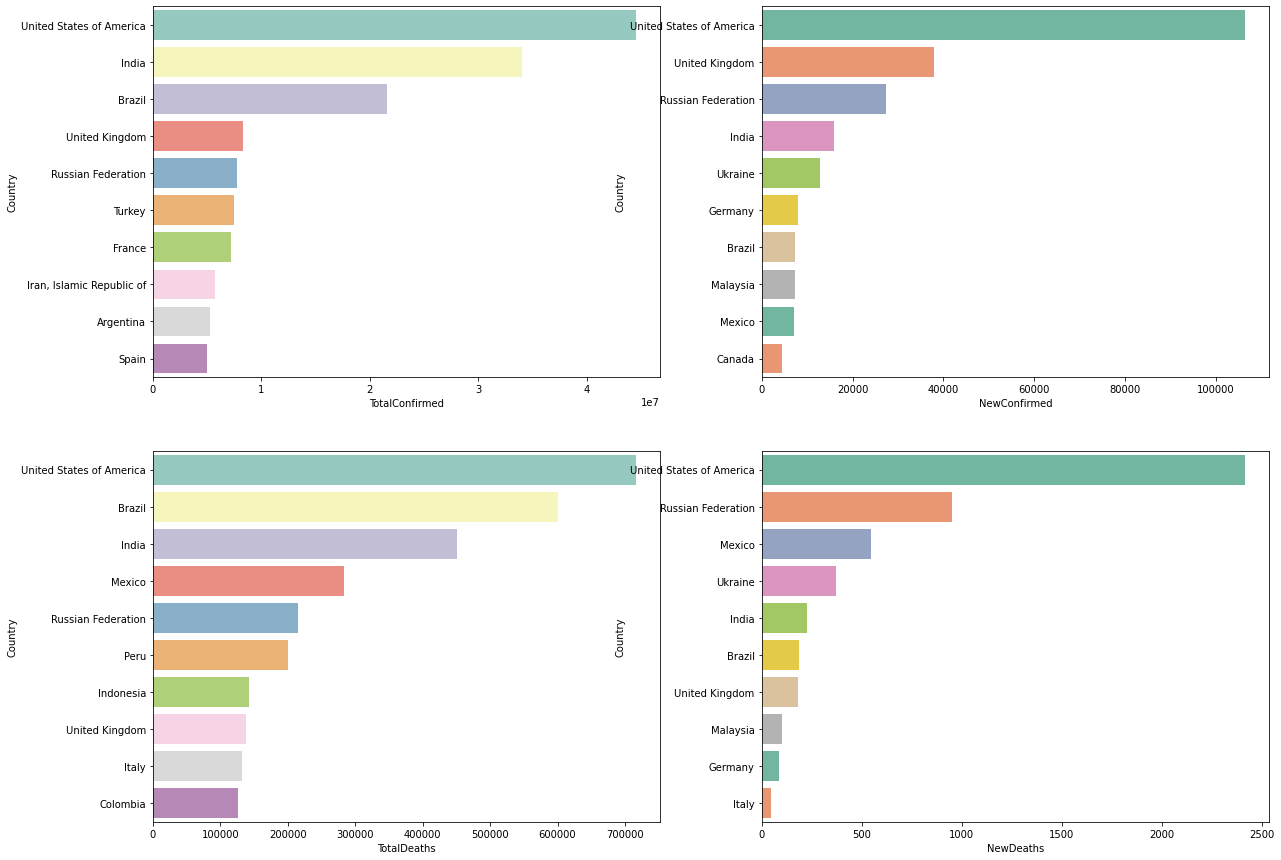

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

df = df.sort_values(by='TotalConfirmed', ascending = False)
sns.barplot(x='TotalConfirmed', 
            y="Country",palette="Set3",
            data=df.iloc[:10],
            ax=ax[0, 0])


df = df.sort_values(by='NewConfirmed', ascending = False)
sns.barplot(x='NewConfirmed', 
            y="Country",palette="Set2",
            data=df.iloc[:10],
            ax=ax[0, 1])

df = df.sort_values(by='TotalDeaths', ascending = False)
sns.barplot(x='TotalDeaths', 
            y="Country",palette="Set3",
            data=df.iloc[:10],
            ax=ax[1, 0])

df = df.sort_values(by='NewDeaths', ascending = False)
sns.barplot(x='NewDeaths', 
            y="Country",palette="Set2",
            data=df.iloc[:10],
            ax=ax[1, 1])



In [11]:
df=  df[df['Country'].isin(['China', 'India','United States','United Kingdom','Brazil',
                             'Nigeria','Pakistan','Russia','Mexico','Australia'])]

In [12]:
df

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
111,817bc05e-42bb-47d5-9126-eea635c1d774,Mexico,MX,mexico,7187,3732429,546,282773,0,0,2021-10-13T21:15:33.753Z
76,28a6200f-4a74-41ba-b6fd-75d1253efac3,India,IN,india,15823,34001743,226,451189,0,0,2021-10-13T21:15:33.753Z
23,32335e04-fbd5-48be-937f-efa954a4daea,Brazil,BR,brazil,7359,21590097,185,601398,0,0,2021-10-13T21:15:33.753Z
182,42e19ae8-a914-45cd-8521-48eea1761abf,United Kingdom,GB,united-kingdom,37855,8270182,184,138351,0,0,2021-10-13T21:15:33.753Z
129,cd29659f-b4fc-43e5-8337-9b1507d977b5,Pakistan,PK,pakistan,1021,1260669,21,28173,0,0,2021-10-13T21:15:33.753Z
8,369f6aeb-778f-4504-bc75-e2436b708780,Australia,AU,australia,2029,133444,17,1478,0,0,2021-10-13T21:15:33.753Z
126,57957079-a2ec-4fa0-9d52-5387829d780a,Nigeria,NG,nigeria,0,207979,0,2756,0,0,2021-10-13T21:15:33.753Z
35,bf65e13d-2101-4056-a173-92d7c781c6fe,China,CN,china,26,108806,0,4849,0,0,2021-10-13T21:15:33.753Z


In [118]:
all_data = "https://api.covid19api.com/country/south-africa?from=2020-03-01T00:00:00Z&to=2020-04-01T00:00:00Z"

In [120]:
json_alldata = requests.get(all_data).json()
df1 = pd.json_normalize(json_alldata)
df1.shape

# Live data updated every 10 mins : Example South Africa

Returns all cases by case type for a country from the first recorded case

In [13]:
Countries = "https://api.covid19api.com/countries"

In [14]:
json_Count_data = requests.get(Countries).json()

In [15]:
df_Countries = pd.json_normalize(json_Count_data)

In [16]:
df_Countries

,Country,Slug,ISO2
0,Saint Vincent and Grenadines,saint-vincent-and-the-grenadines,VC
1,Benin,benin,BJ
2,Mongolia,mongolia,MN
3,Grenada,grenada,GD
4,Liberia,liberia,LR
...,...,...,...
243,Poland,poland,PL
244,Uruguay,uruguay,UY
245,Sri Lanka,sri-lanka,LK
246,Togo,togo,TG


In [17]:
live = "https://api.covid19api.com/total/dayone/country/south-africa"

In [18]:
json_live_data = requests.get(live).json()

In [19]:
df2 = pd.json_normalize(json_live_data)

In [20]:
df2

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,South Africa,,,,,0,0,1,0,0,1,2020-03-05T00:00:00Z
1,South Africa,,,,,0,0,1,0,0,1,2020-03-06T00:00:00Z
2,South Africa,,,,,0,0,1,0,0,1,2020-03-07T00:00:00Z
3,South Africa,,,,,0,0,3,0,0,3,2020-03-08T00:00:00Z
4,South Africa,,,,,0,0,3,0,0,3,2020-03-09T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
582,South Africa,,,,,0,0,2910681,88236,0,2822445,2021-10-08T00:00:00Z
583,South Africa,,,,,0,0,2911497,88292,0,2823205,2021-10-09T00:00:00Z
584,South Africa,,,,,0,0,2912145,88317,0,2823828,2021-10-10T00:00:00Z
585,South Africa,,,,,0,0,2912346,88346,0,2824000,2021-10-11T00:00:00Z


### Historical data to train the model

In [ ]:
main_df = []
for row in range(len(df_Countries)):
    live = "https://api.covid19api.com/total/dayone/country/" + df_Countries.Slug[row]
    json_live_data = requests.get(live).json()
    df_country = pd.json_normalize(json_live_data)
    main_df.append(df_country)

In [ ]:
main_df = pd.concat(main_df)

In [ ]:
main_df['date_only'] = pd.to_datetime(main_df['Date']).dt.date

In [ ]:
main_df.drop(['CityCode', 'CountryCode','Province', 'City', 'Lat', 'Lon', 'Date'], axis=1, inplace=True)

In [134]:
main_df.head()

,Country,Confirmed,Deaths,Recovered,Active,message,success,date_only,CurrentCase
0,Saint Vincent and Grenadines,1.0,0.0,0.0,1.0,NaN,NaN,2020-03-14,1.0
1,Saint Vincent and Grenadines,1.0,0.0,0.0,1.0,NaN,NaN,2020-03-15,1.0
2,Saint Vincent and Grenadines,1.0,0.0,0.0,1.0,NaN,NaN,2020-03-16,1.0
3,Saint Vincent and Grenadines,1.0,0.0,0.0,1.0,NaN,NaN,2020-03-17,1.0
4,Saint Vincent and Grenadines,1.0,0.0,0.0,1.0,NaN,NaN,2020-03-18,1.0


In [135]:
main_df.shape

(106007, 9)

**Save data to local directory**

In [136]:
main_df.to_csv(os.path.basename(pwd +'/main_data.csv'))

**Get saved data from directory**

In [23]:
main_df = pd.read_csv(os.path.basename(pwd +'/main_data.csv'))

In [24]:
df_austria = main_df[main_df.Country == 'Australia'].reset_index()

In [25]:
df_austria.shape

(624, 11)

In [29]:
df_austria = df_austria.sort_values(by='date_only')

assert (pd.date_range(start=df_austria.date_only.iloc[0], 
                      end=df_austria.date_only.iloc[-1], freq='D') == df_austria.date_only).all()

df_austria.index = pd.date_range(start=df_austria.date_only.iloc[0], 
                                 end=df_austria.date_only.iloc[-1], freq='D')

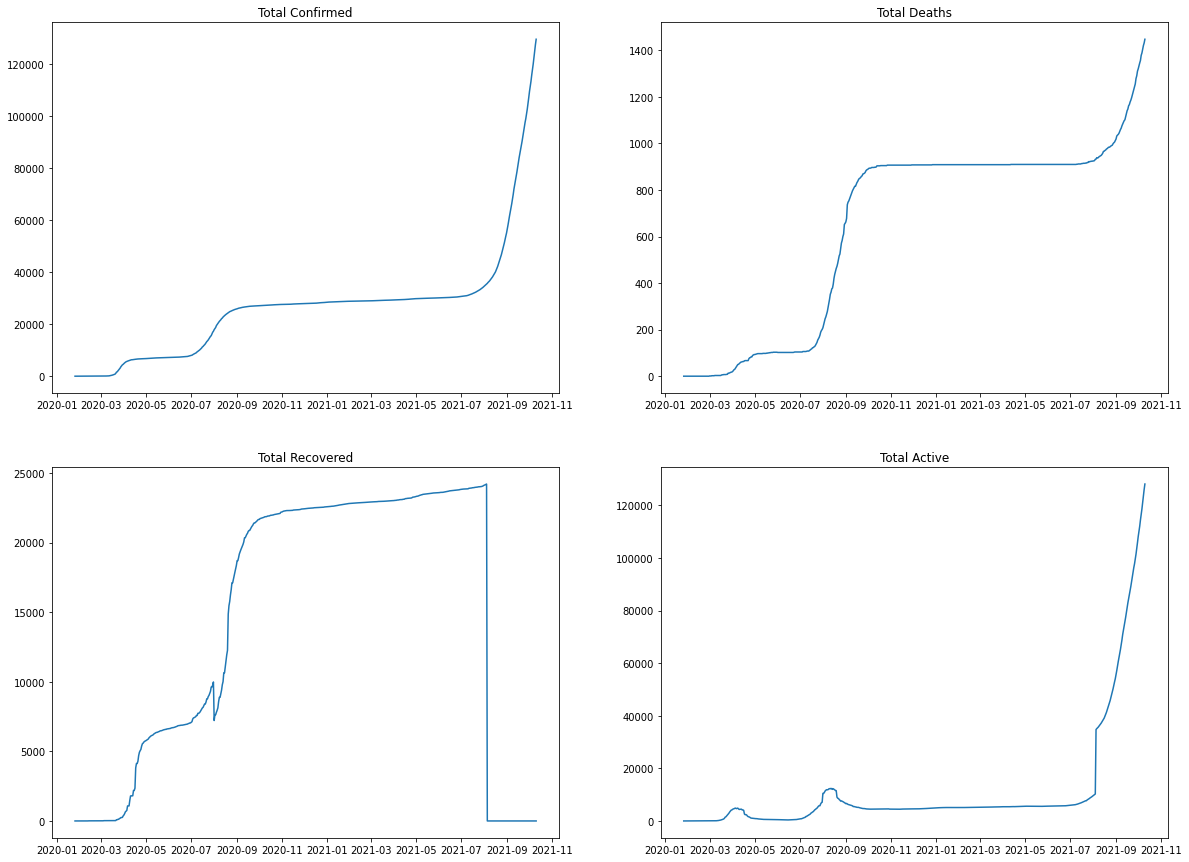

In [30]:
fig = plt.figure(figsize=(20,15))

plot= ['Confirmed','Deaths','Recovered','Active']

for idx, val in enumerate(plot):
    ax1 = plt.subplot(2, 2, idx+1)
    plt.plot(df_austria.index, df_austria[val].values)
    plt.title("Total " + val )
    
    
# plt.show()

In [31]:
main_df.describe()

,Unnamed: 0,Confirmed,Deaths,Recovered,Active,CurrentCase
count,106007.000000,1.059960e+05,105996.000000,1.059960e+05,1.059960e+05,1.059960e+05
mean,289.989557,4.912523e+05,11226.568786,2.138554e+05,2.664610e+05,2.661704e+05
std,169.502270,2.446202e+06,47586.235713,1.195093e+06,2.046726e+06,2.049425e+06
min,0.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,-2.259070e+05
25%,143.000000,1.816000e+03,28.000000,5.800000e+01,2.160000e+02,2.160000e+02
50%,288.000000,1.759150e+04,298.500000,4.259500e+03,2.933000e+03,2.934000e+03
75%,436.000000,1.708642e+05,3321.000000,6.609600e+04,2.691675e+04,2.686425e+04
max,627.000000,4.433975e+07,713227.000000,3.097475e+07,4.362652e+07,4.362652e+07


In [32]:
main_df.corr()

,Unnamed: 0,Confirmed,Deaths,Recovered,Active,CurrentCase
Unnamed: 0,1.000000,0.195137,0.201030,0.120584,0.158265,0.157932
Confirmed,0.195137,1.000000,0.930022,0.522453,0.867491,0.867349
Deaths,0.201030,0.930022,1.000000,0.500794,0.795270,0.794828
Recovered,0.120584,0.522453,0.500794,1.000000,0.029125,0.028838
Active,0.158265,0.867491,0.795270,0.029125,1.000000,0.999991
CurrentCase,0.157932,0.867349,0.794828,0.028838,0.999991,1.000000


In [33]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106007 entries, 0 to 106006
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   106007 non-null  int64  
 1   Country      105996 non-null  object 
 2   Confirmed    105996 non-null  float64
 3   Deaths       105996 non-null  float64
 4   Recovered    105996 non-null  float64
 5   Active       105996 non-null  float64
 6   message      11 non-null      object 
 7   success      11 non-null      object 
 8   date_only    105996 non-null  object 
 9   CurrentCase  105996 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 8.1+ MB


In [34]:
# Feature Engineering
main_df['CurrentCase'] = main_df['Confirmed'] - main_df['Recovered'] - main_df['Deaths']

In [35]:
date_df = main_df.groupby('date_only')[['Confirmed' ,'Recovered', 'Deaths', 'CurrentCase']].sum().reset_index()

In [36]:
date_df.head(10)

,date_only,Confirmed,Recovered,Deaths,CurrentCase
0,2020-01-22,557.0,30.0,17.0,510.0
1,2020-01-23,655.0,32.0,18.0,605.0
2,2020-01-24,941.0,39.0,26.0,876.0
3,2020-01-25,1433.0,42.0,42.0,1349.0
4,2020-01-26,2117.0,56.0,56.0,2005.0
5,2020-01-27,2926.0,65.0,82.0,2779.0
6,2020-01-28,5577.0,108.0,131.0,5338.0
7,2020-01-29,6166.0,127.0,133.0,5906.0
8,2020-01-30,8234.0,145.0,171.0,7918.0
9,2020-01-31,9926.0,225.0,213.0,9488.0


<AxesSubplot:>

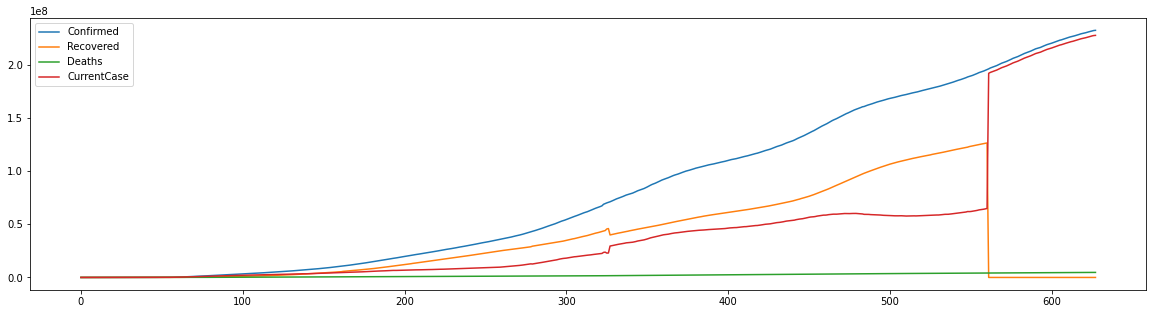

In [37]:
date_df.plot(kind='line', figsize=(20,5))

In [38]:
dfCountry = main_df.groupby(["Country",'date_only'])[['Confirmed', 'Deaths', 'Recovered', 'CurrentCase']].sum().reset_index()

In [39]:
dfCountry.shape # This information we are getting from API "https://api.covid19api.com/summary"

(105996, 6)

- Getting data from different source: https://github.com/owid/covid-19-data/tree/master/public/data

In [41]:
covid_df = pd.read_csv(os.path.basename(pwd +'/covid-data.csv'))

In [42]:
covid_df.head() #Country ,Confirmed ,Deaths ,Recovered,Active ,date_only,CurrentCase

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [47]:
df_final = covid_df[['location', 'date','total_cases','new_cases','total_deaths',
                     'new_deaths','population']]

df_final=  df_final[~df_final['location'].isin(['World', 'Asia','North America',
                                                'South America','Africa','Europe','Oceania'])]

In [48]:
df_final

,location,date,total_cases,new_cases,total_deaths,new_deaths,population
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,39835428.0
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,39835428.0
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,39835428.0
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,39835428.0
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,39835428.0
...,...,...,...,...,...,...,...
123314,Zimbabwe,2021-10-08,131705.0,182.0,4634.0,3.0,15092171.0
123315,Zimbabwe,2021-10-09,131762.0,57.0,4636.0,2.0,15092171.0
123316,Zimbabwe,2021-10-10,131796.0,34.0,4637.0,1.0,15092171.0
123317,Zimbabwe,2021-10-11,131875.0,79.0,4643.0,6.0,15092171.0


<AxesSubplot:xlabel='population', ylabel='location'>

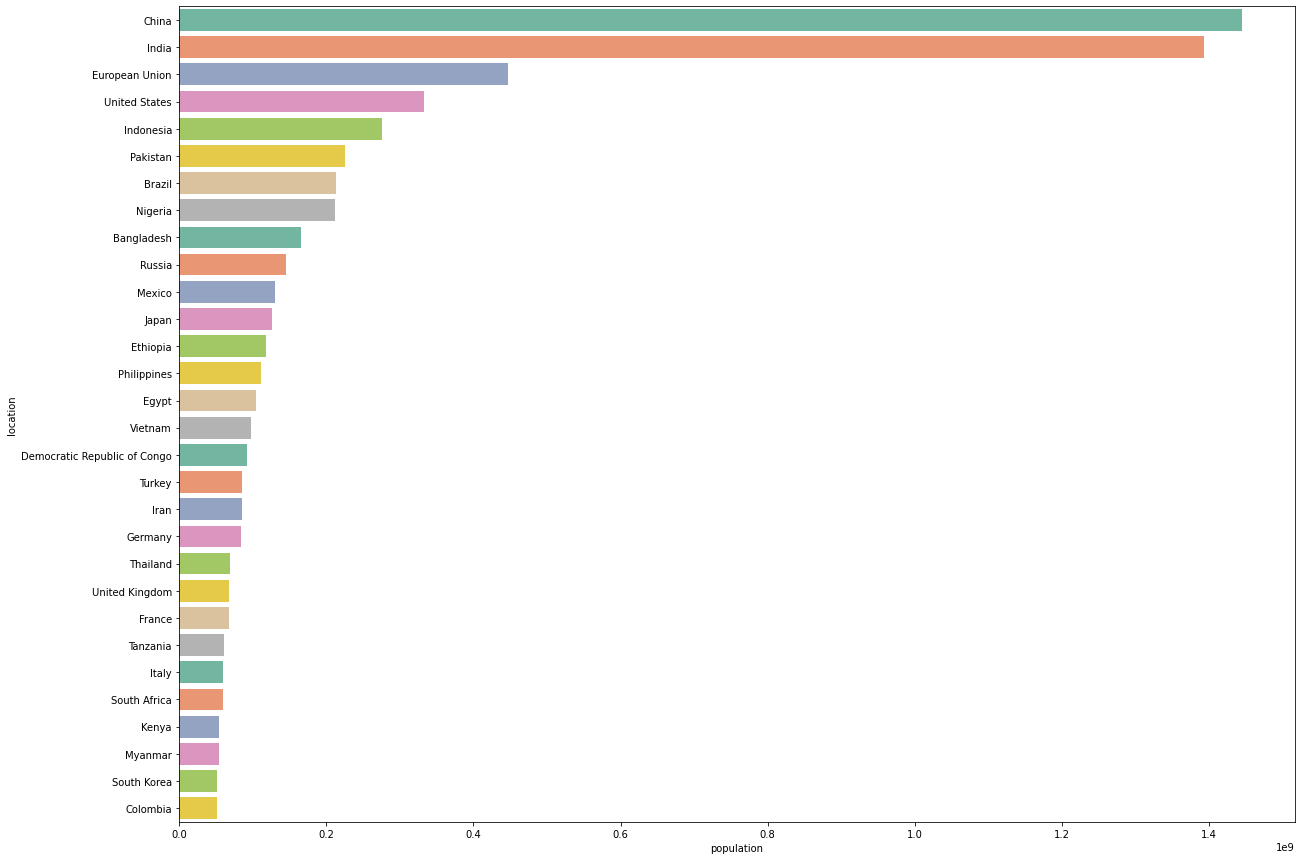

In [49]:
fig = plt.figure(figsize=(20,15))

df1= df_final[df_final.date == '2021-10-12']
df1 = df1.sort_values(by='population', ascending = False)
sns.barplot(x='population', 
            y="location",palette="Set2",
            data=df1.iloc[:30])

Selecting 10 countries

In [50]:
df_final=  df_final[df_final['location'].isin(['China', 'India','United States','United Kingdom','Brazil',
                             'Nigeria','Pakistan','Russia','Mexico','Australia'])]

In [51]:
df_final.shape

(6185, 7)

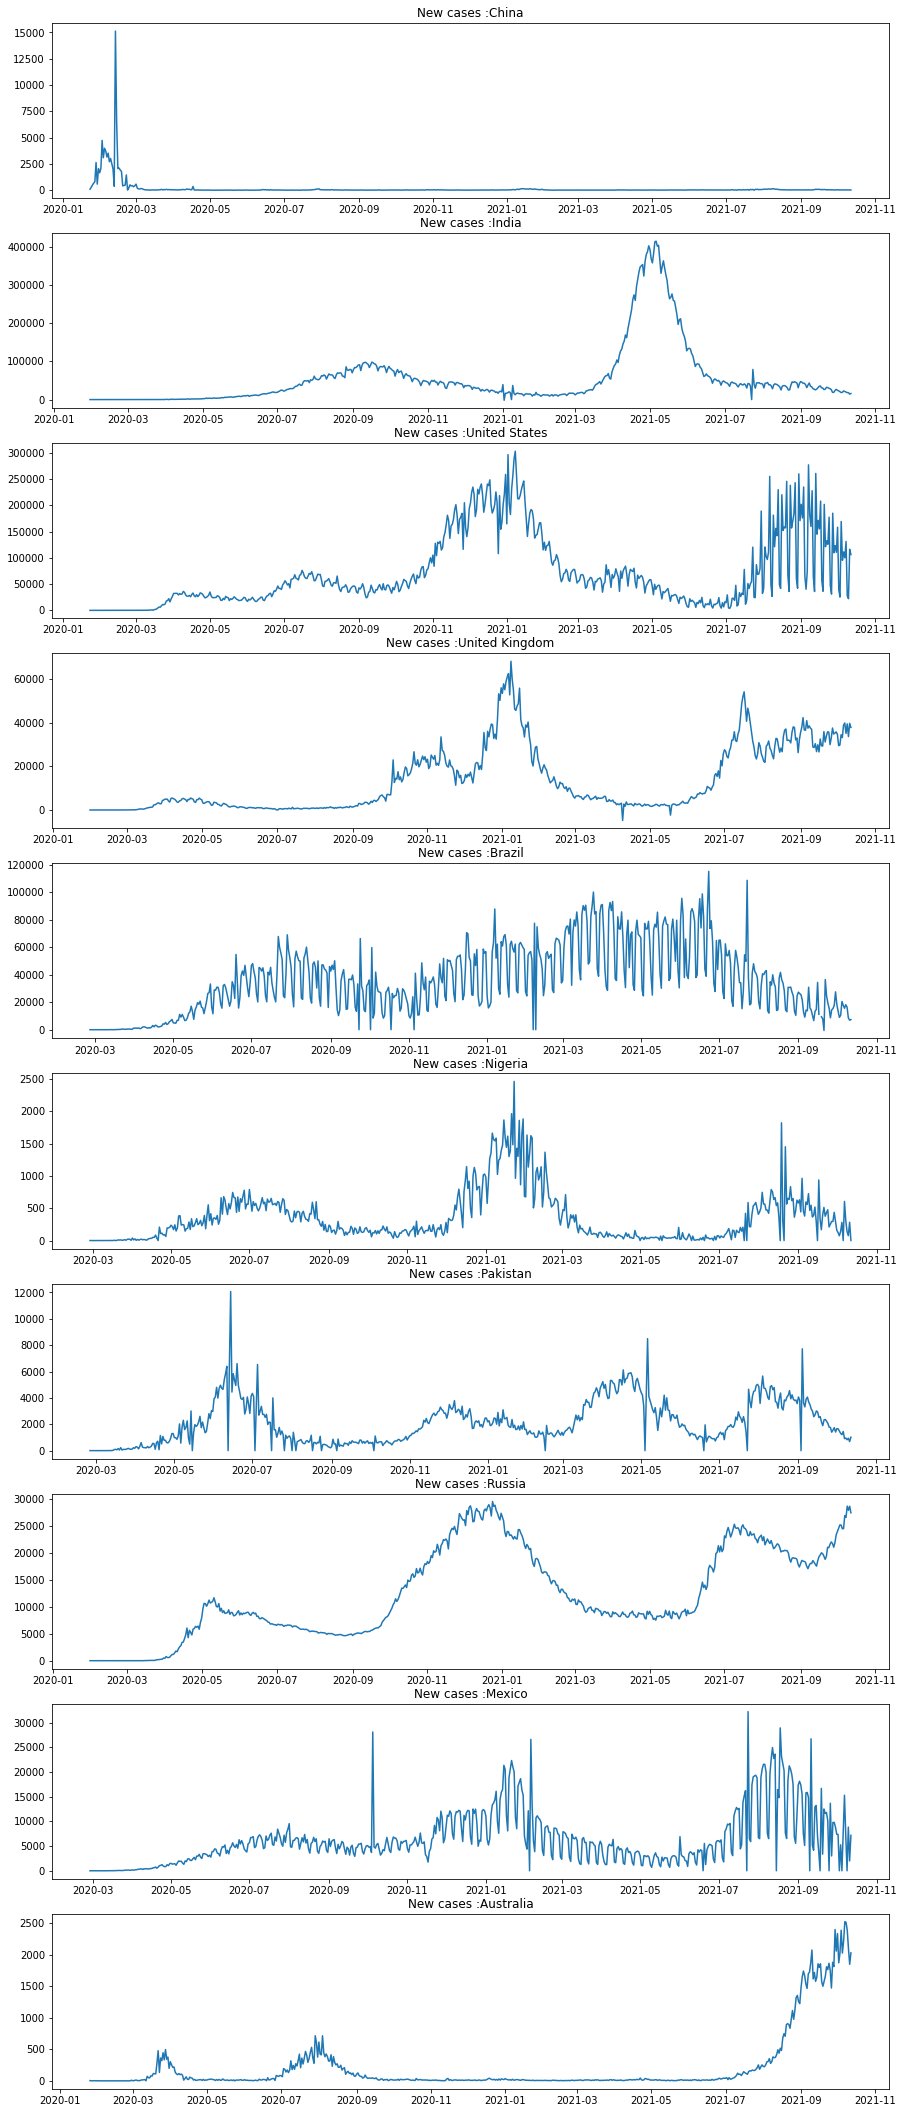

In [52]:
countries = ['China', 'India','United States','United Kingdom','Brazil',
                             'Nigeria','Pakistan','Russia','Mexico', 'Australia']

fig = plt.figure(figsize=(15,38))
for idx, country in enumerate(countries):
    ax1 = plt.subplot(10, 1, idx+1)
    
    df_idx = df_final[df_final.location == country ]
    df_idx = df_idx.sort_values(by='date')

    assert (pd.date_range(start=df_idx.date.iloc[0], 
                      end=df_idx.date.iloc[-1], freq='D') == df_idx.date).all()

    df_idx.index = pd.date_range(start=df_idx.date.iloc[0], 
                                 end=df_idx.date.iloc[-1], freq='D')
    
    plt.plot(df_idx.index, df_idx['new_cases'].values)
    plt.title("New cases :" +  country)

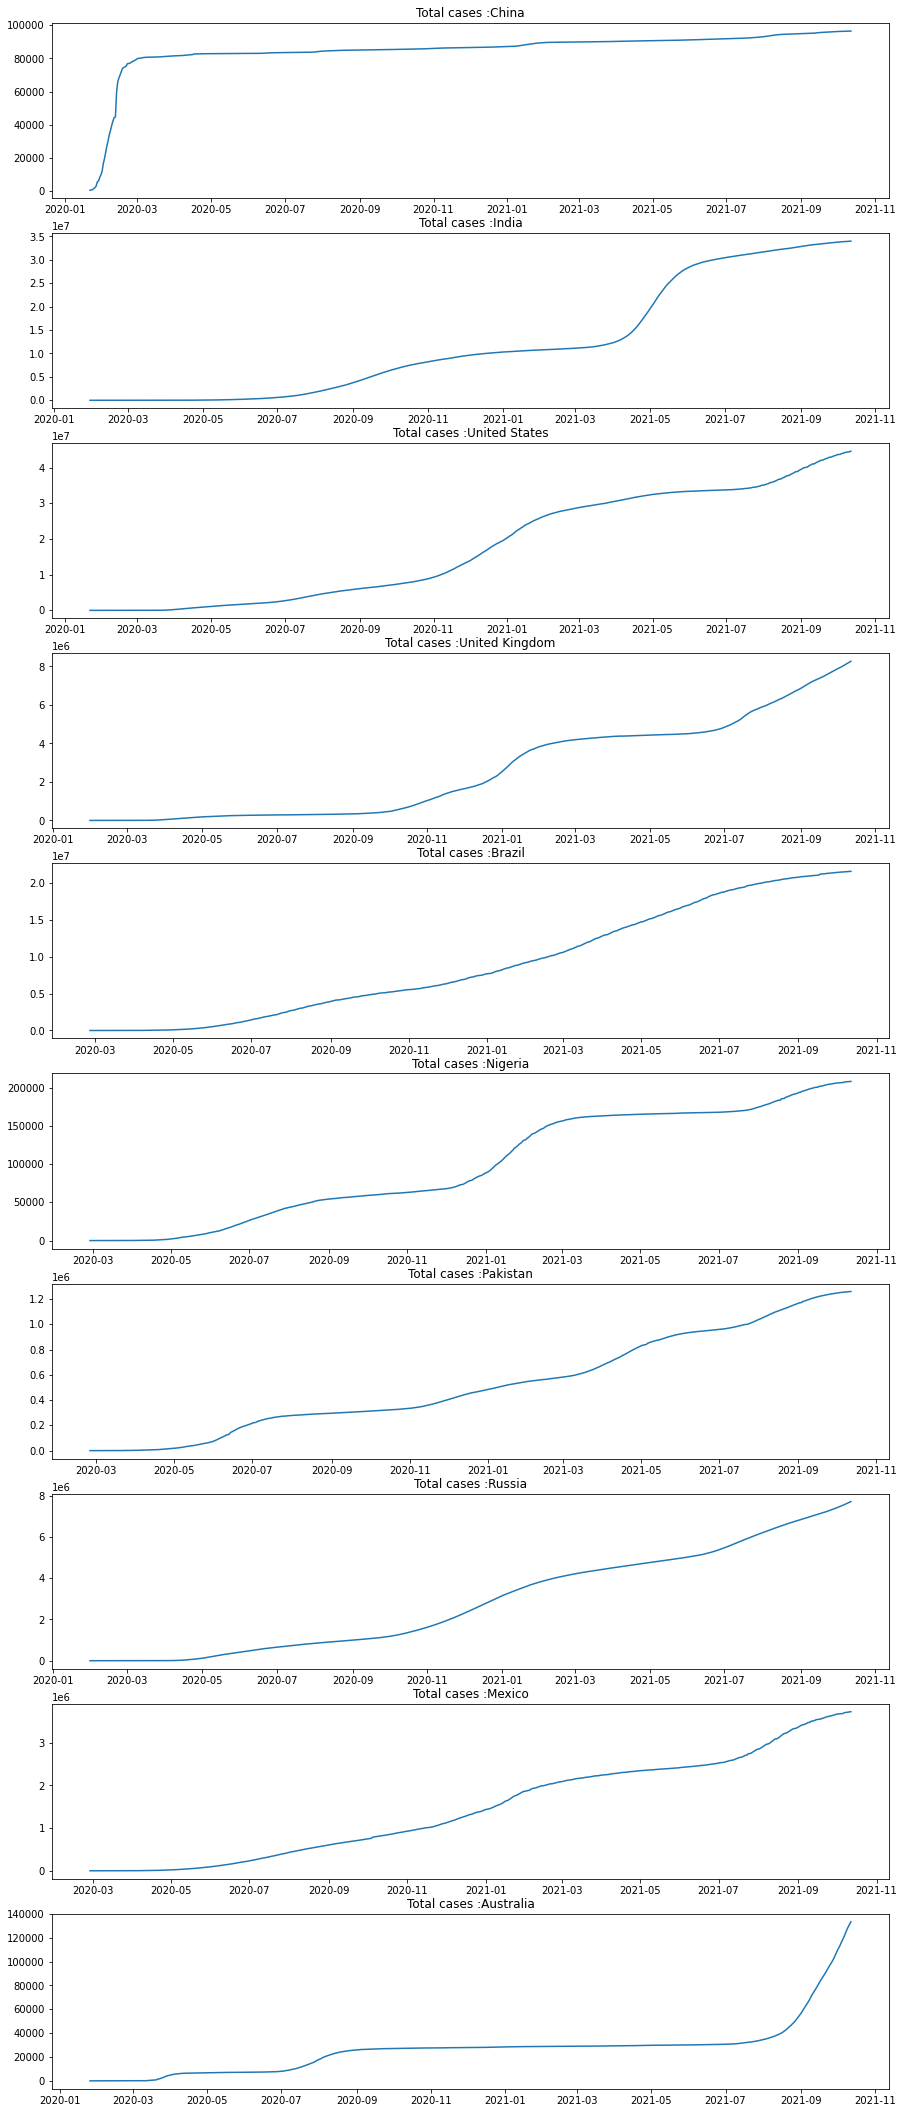

In [55]:
fig = plt.figure(figsize=(15,38))
for idx, country in enumerate(countries):
    ax1 = plt.subplot(10, 1, idx+1)
    
    df_idx = df_final[df_final.location == country ]
    df_idx = df_idx.sort_values(by='date')

    assert (pd.date_range(start=df_idx.date.iloc[0], 
                      end=df_idx.date.iloc[-1], freq='D') == df_idx.date).all()

    df_idx.index = pd.date_range(start=df_idx.date.iloc[0], 
                                 end=df_idx.date.iloc[-1], freq='D')
    
    plt.plot(df_idx.index, df_idx['total_cases'].values)
    plt.title("Total cases :" +  country)

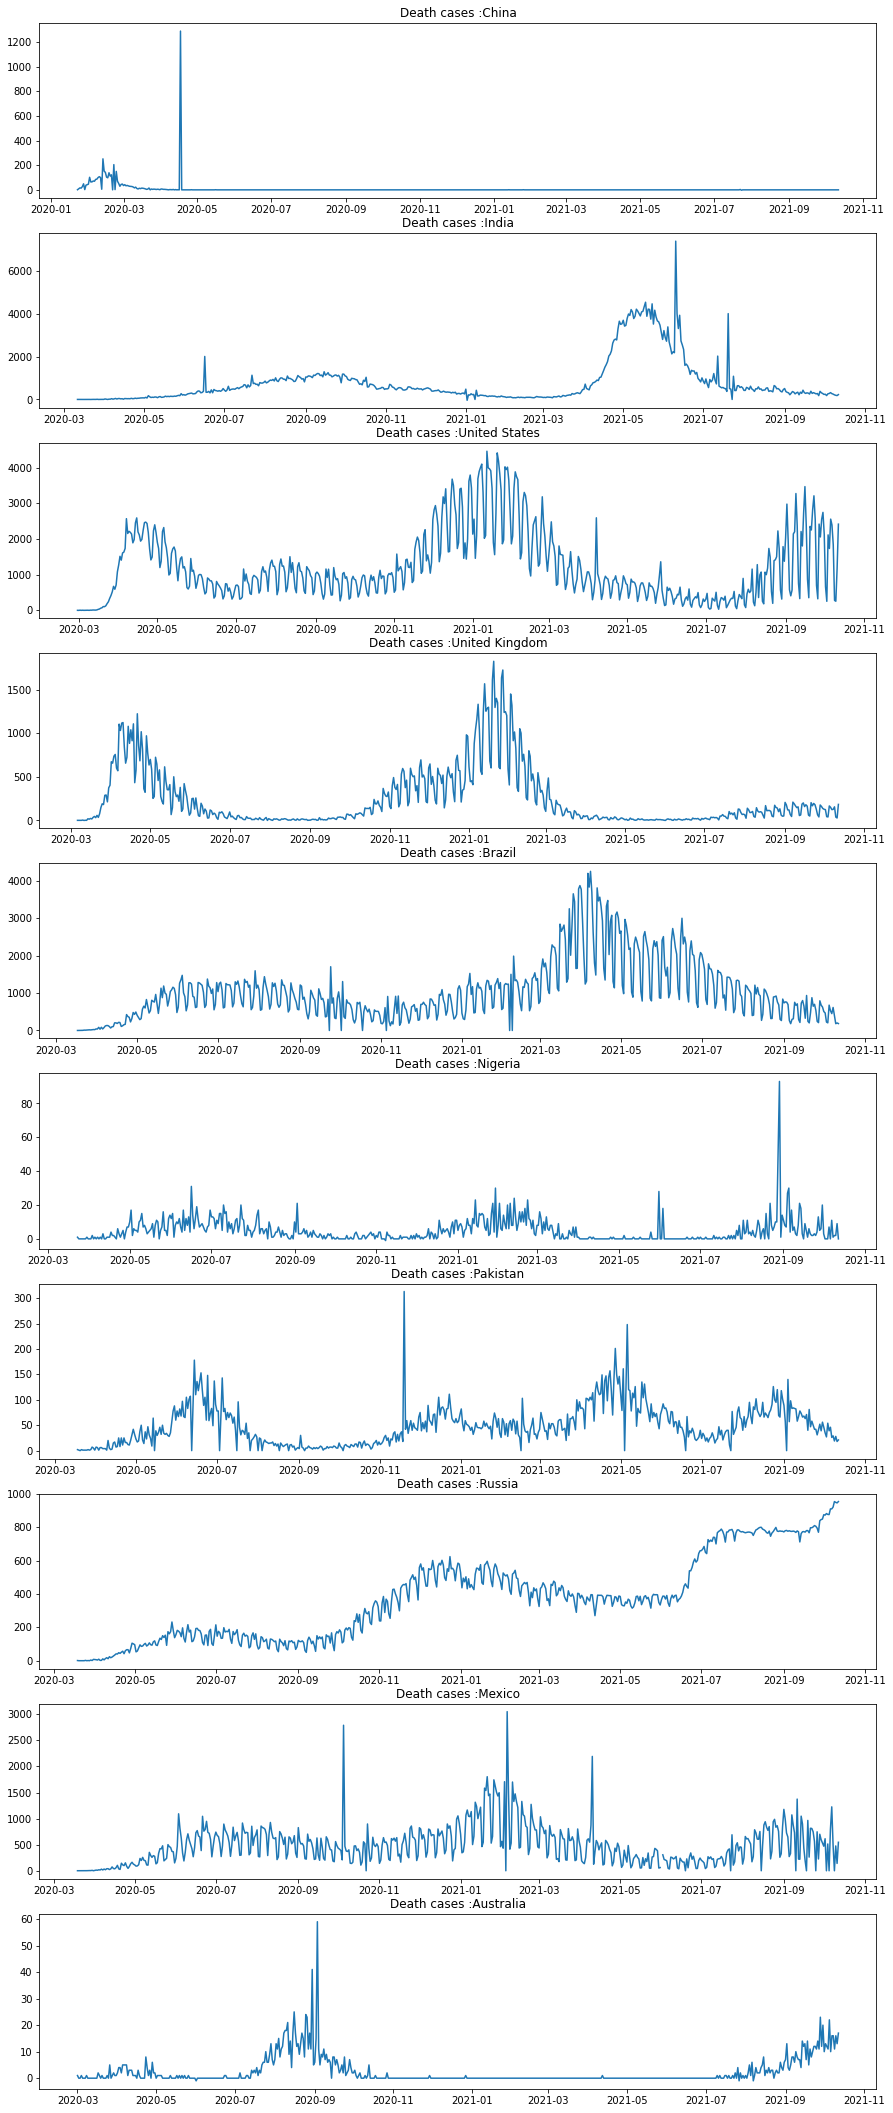

In [54]:
fig = plt.figure(figsize=(15,38))
for idx, country in enumerate(countries):
    ax1 = plt.subplot(10, 1, idx+1)
    
    df_idx = df_final[df_final.location == country ]
    df_idx = df_idx.sort_values(by='date')

    assert (pd.date_range(start=df_idx.date.iloc[0], 
                      end=df_idx.date.iloc[-1], freq='D') == df_idx.date).all()

    df_idx.index = pd.date_range(start=df_idx.date.iloc[0], 
                                 end=df_idx.date.iloc[-1], freq='D')
    
    plt.plot(df_idx.index, df_idx['new_deaths'].values)
    plt.title("Death cases :" +  country)

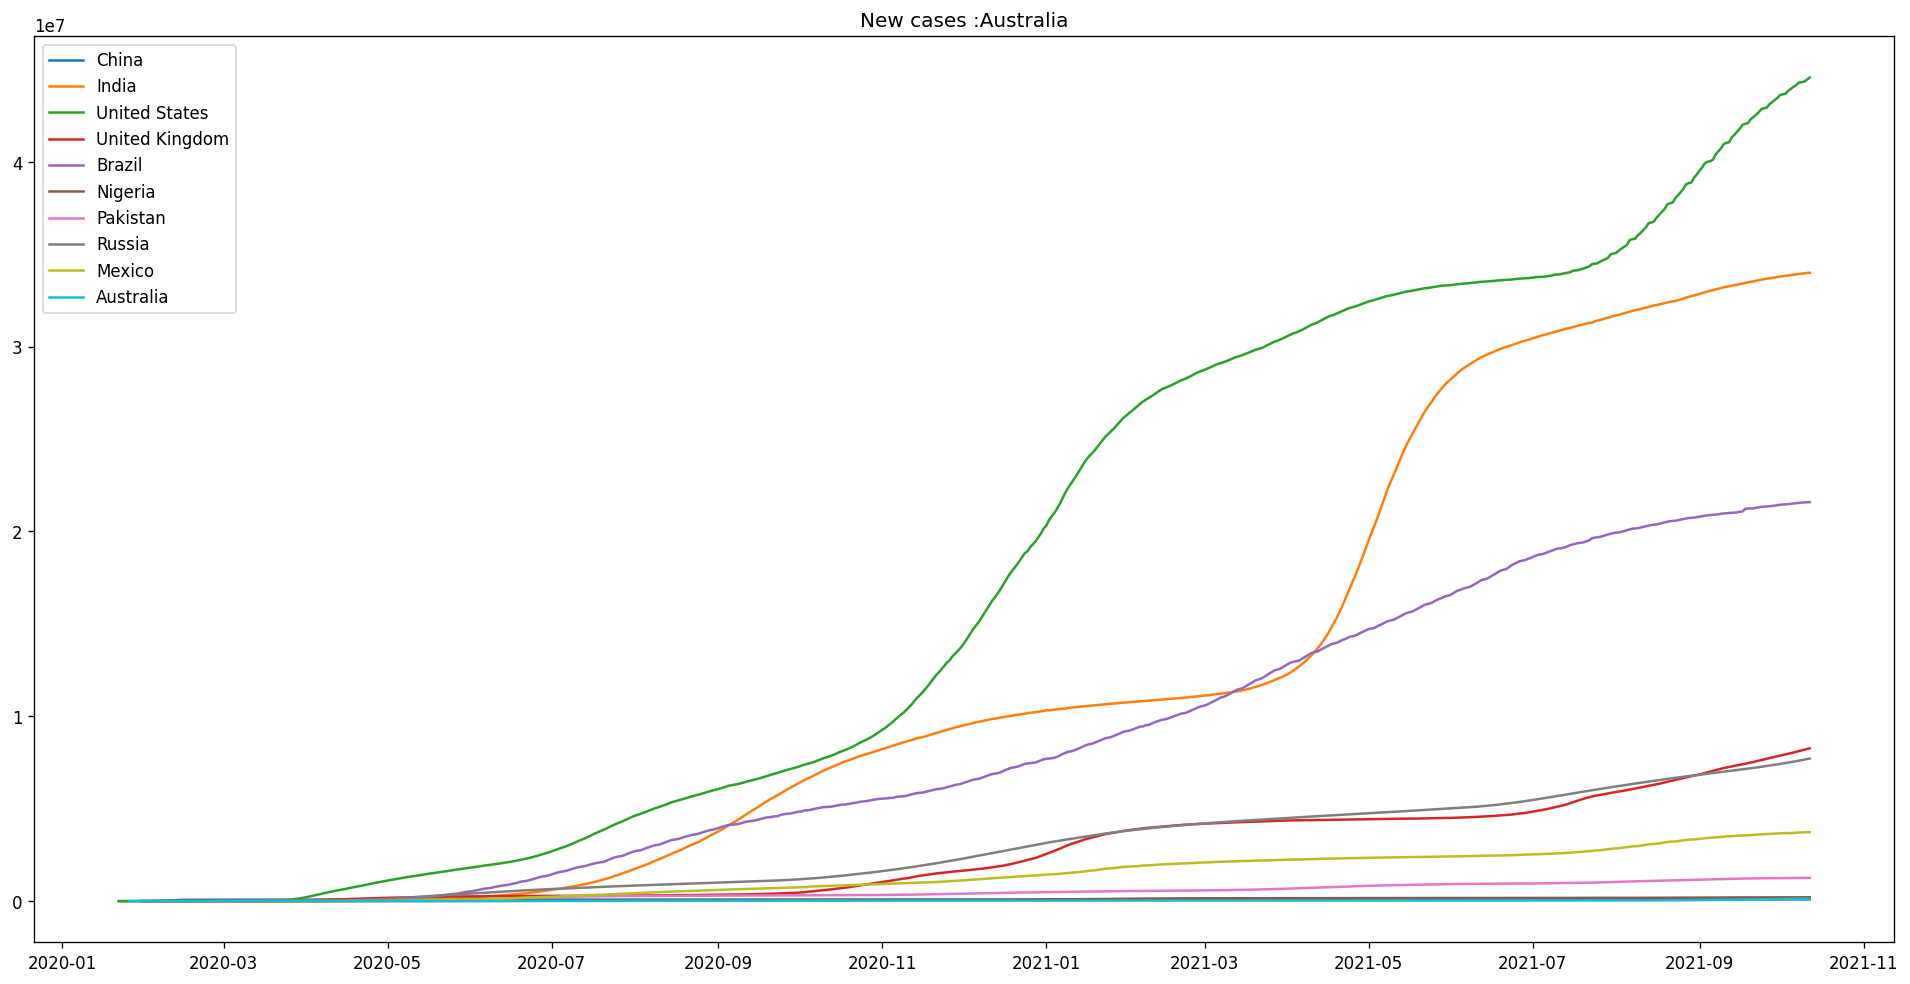

In [76]:
fig = plt.figure(figsize=(20,10))
for idx, country in enumerate(countries):
#     ax1 = plt.subplot(10, 1, idx+1)
    
    df_idx = df_final[df_final.location == country ]
    df_idx = df_idx.sort_values(by='date')

    assert (pd.date_range(start=df_idx.date.iloc[0], 
                      end=df_idx.date.iloc[-1], freq='D') == df_idx.date).all()

    df_idx.index = pd.date_range(start=df_idx.date.iloc[0], 
                                 end=df_idx.date.iloc[-1], freq='D')
    
    plt.plot(df_idx.index, df_idx['total_cases'].values)
    plt.title("New cases :" +  country)
    
plt.legend(countries)

## SARIMA Model ( Seasonal Auto-Regressive Integrated Moving Average )

**SARIMA(p, d, q)(P, D, Q, m)**

Non-Seasonal Parameters:

- p (AR component): Same as the AR component in ARIMA.
- d (I component): Same as the I component in ARIMA. Denotes the number of times successive differencing operation is performed to make the series stationary.
- q (MA component): Same as the MA component in ARIMA.

Seasonal Parameters:

- m (Seasonal Period)
- P (Seasonal AR component)
- D (Seasonal I component)
- Q (Seasonal MA Component)


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import numpy as np
import sys
import itertools

In [57]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [161]:
recovered = date_df[['date_only', 'Recovered']]
for index, row in recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0
        
death = date_df[['date_only', 'Deaths']]
for index, row in death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0
        
confirmed = date_df[['date_only', 'Confirmed']]
for index, row in confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

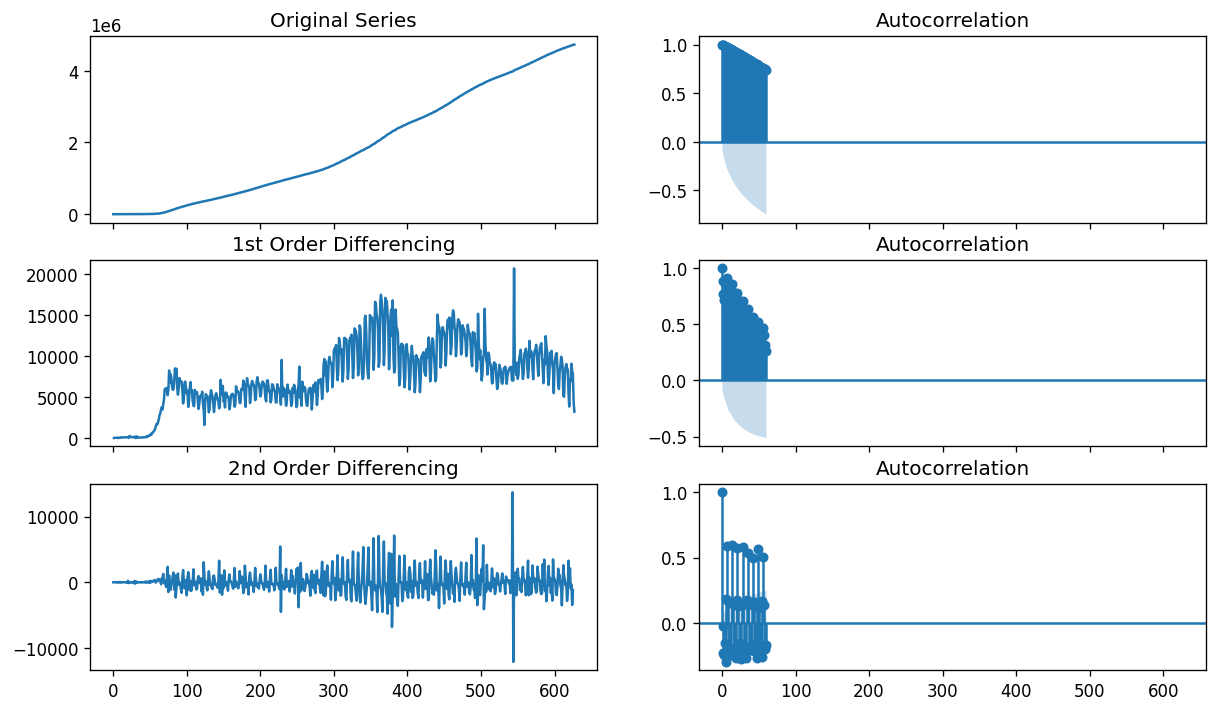

In [195]:
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(death['Deaths']); axes[0, 0].set_title('Original Series')
plot_acf(death['Deaths'], ax=axes[0, 1],lags= 60)

# 1st Differencing
axes[1, 0].plot(death['Deaths'].diff().dropna()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(death['Deaths'].diff().dropna(), ax=axes[1, 1],lags= 60)
diffval = death['Deaths'].diff().dropna()

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1],lags= 60)
plt.show()

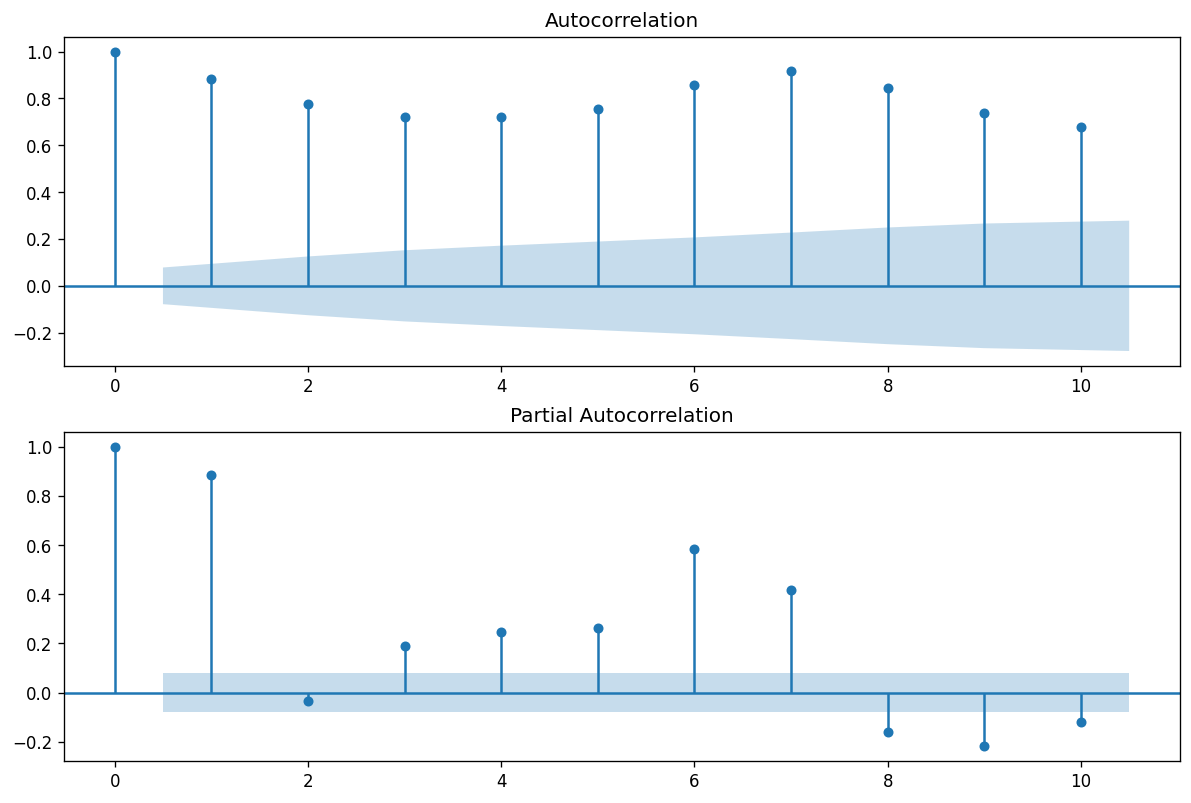

In [94]:
#Autocorrelation Graphs
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(death['Deaths'].diff().dropna(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(death['Deaths'].diff().dropna(), lags=10, ax=ax2)
plt.show()

In [91]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [124]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
#         smt.graphics.plot_acf(y, ax=acf_ax)
        sm.graphics.tsa.plot_acf(y.diff().dropna(), lags=lags, ax=acf_ax)

#         smt.graphics.plot_pacf(y, ax=pacf_ax)
        sm.graphics.tsa.plot_pacf(y.diff().dropna(), lags=lags, ax=pacf_ax)
        plt.tight_layout()

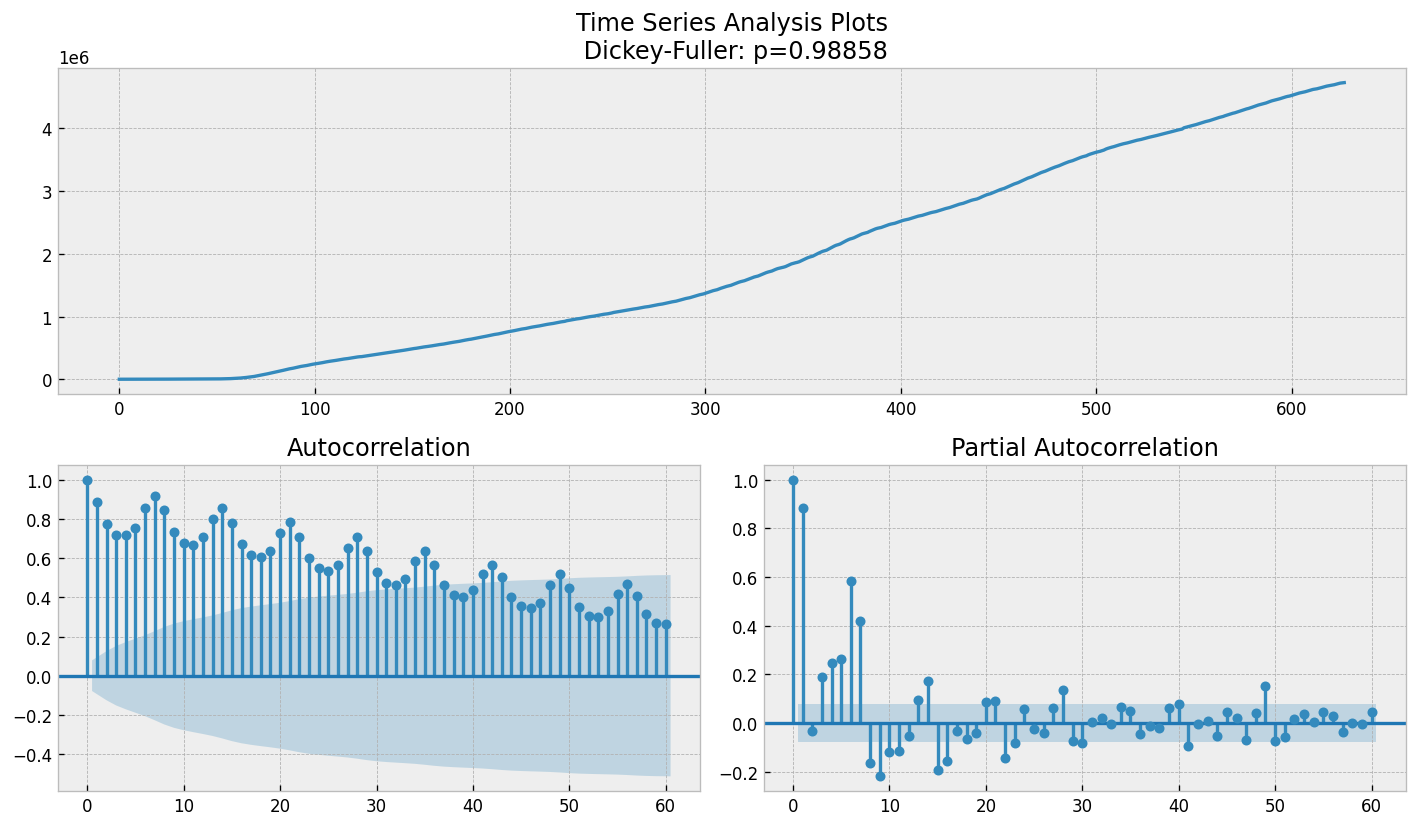

In [125]:
tsplot(death.Deaths,60)

In [133]:
from itertools import product       
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 2)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [136]:
from tqdm import tqdm_notebook
def optimizeSARIMA(y, parameters_list, d, D, s):
#     Return dataframe with parameters and corresponding AIC
        
#         y - time series
#         parameters_list - list with (p, q, P, Q) tuples
#         d - integration order in ARIMA model
#         D - seasonal integration order 
#         s - length of season
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(y, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [137]:
%%time
warnings.filterwarnings("ignore") 
result_table = optimizeSARIMA(death.Deaths, parameters_list, d, D, s)


Wall time: 18min 5s


In [138]:
result_table.head()

,parameters,aic
0,"(4, 3, 1, 1)",10424.039797
1,"(4, 3, 0, 1)",10445.489947
2,"(4, 4, 1, 1)",10466.530684
3,"(4, 4, 0, 1)",10480.846067
4,"(3, 3, 1, 1)",10495.230079


In [139]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0] #4 3 1 1

best_model=sm.tsa.statespace.SARIMAX(death.Deaths, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                               Deaths   No. Observations:                  628
Model:             SARIMAX(4, 1, 3)x(1, 1, [1], 24)   Log Likelihood               -5202.020
Date:                              Wed, 13 Oct 2021   AIC                          10424.040
Time:                                      21:44:29   BIC                          10468.059
Sample:                                           0   HQIC                         10441.172
                                              - 628                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.1612      0.084     25.594      0.000       1.996       2.327
ar.L2         -2.05

In [144]:
print(p, q, P, Q)

4 3 1 1


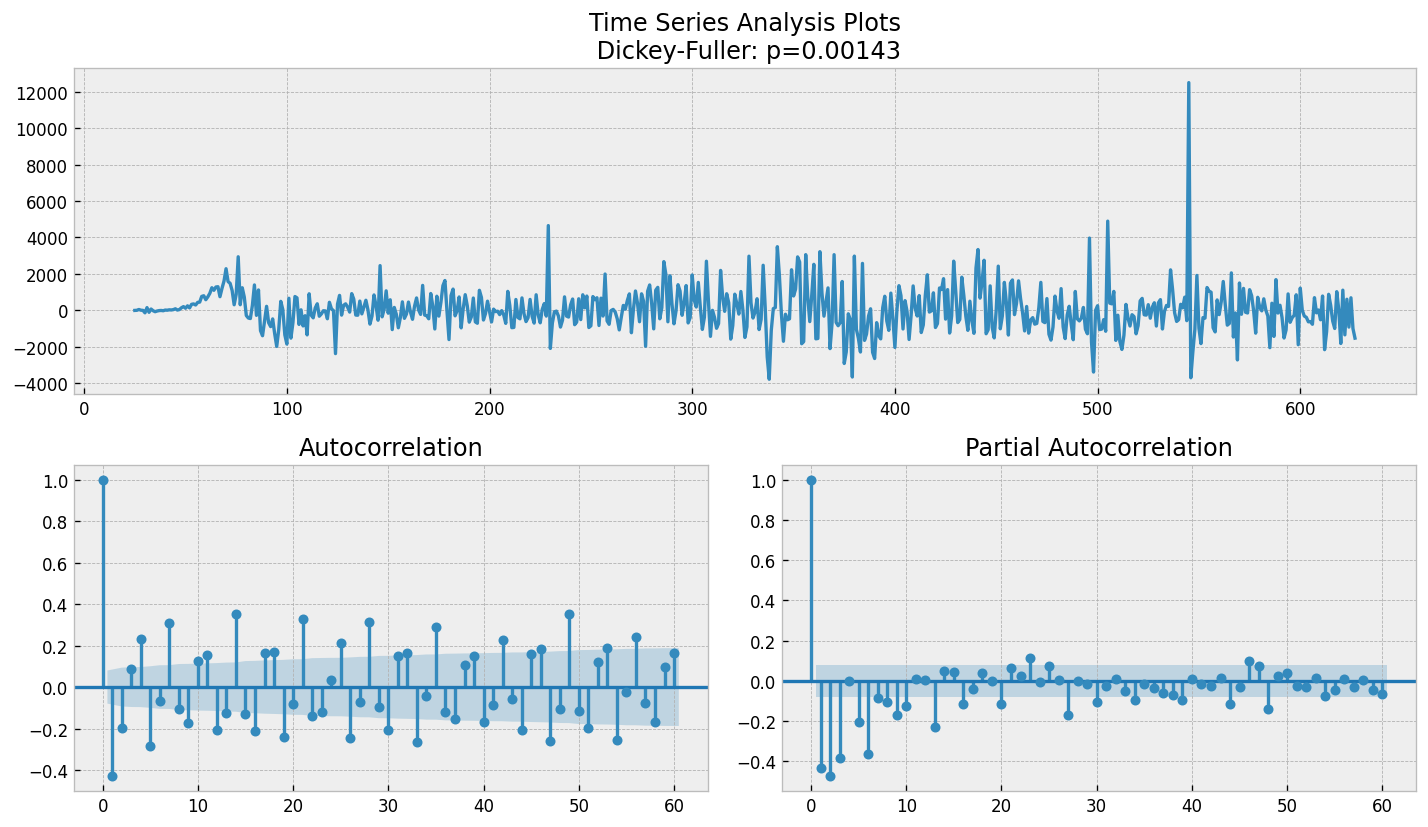

In [140]:
tsplot(best_model.resid[24+1:], lags=60)

In [206]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotSARIMA(series, model, n_steps):
    """Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future    
    """
    
    # adding model values
    data = series.copy()
#     data.columns = ['actual']
    data['sarima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['sarima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.sarima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['Deaths'][s+d:], data['sarima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    
    
    plt.plot(data.date_only,data.Deaths, label="actual")
    plt.legend()
    plt.grid(True)

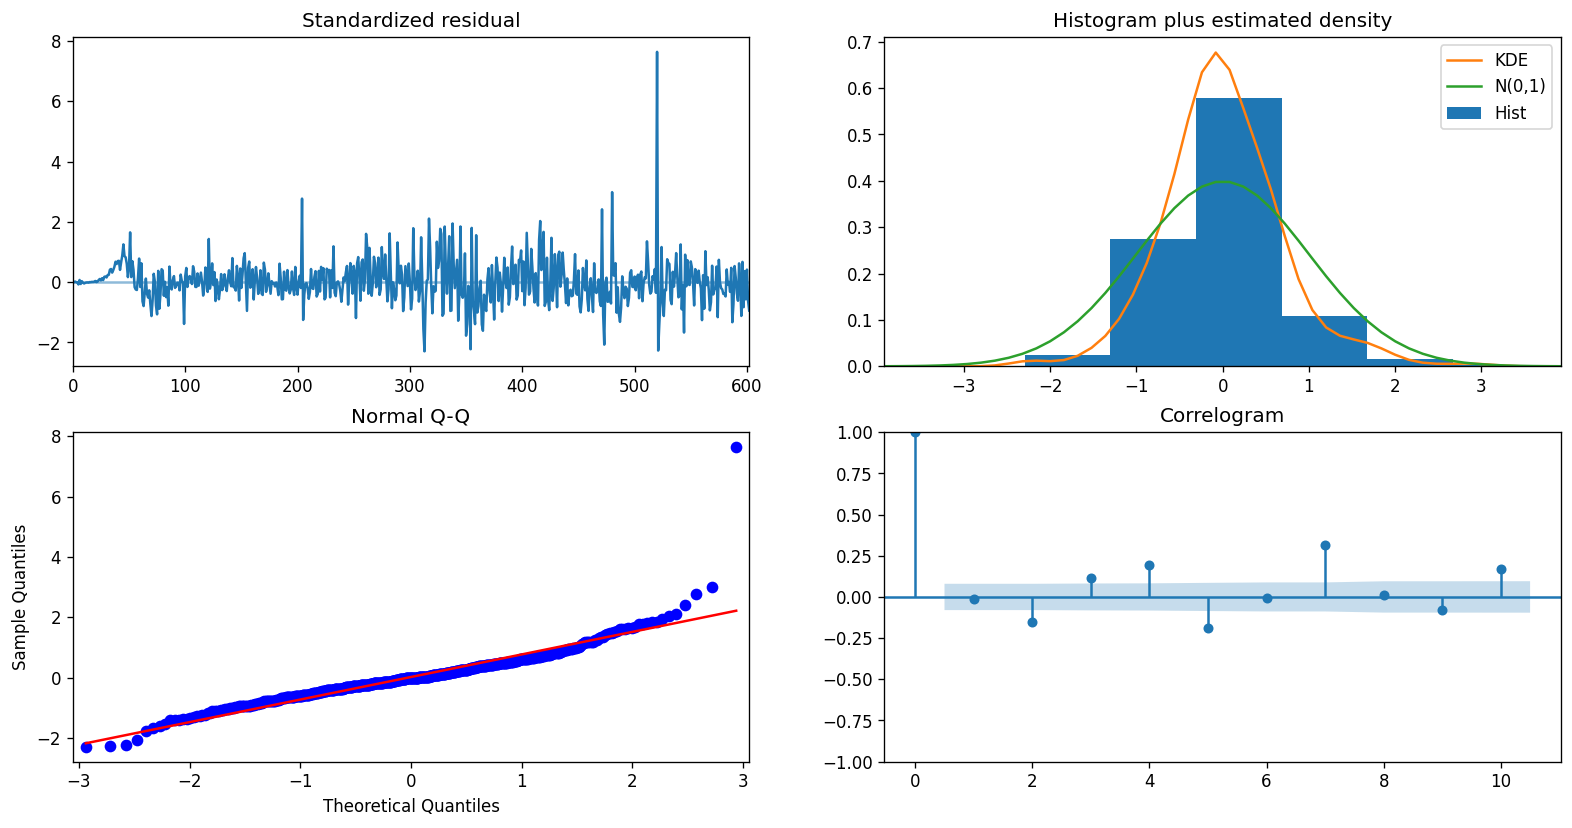

In [151]:
best_model.plot_diagnostics(figsize=(16, 8))
plt.show()

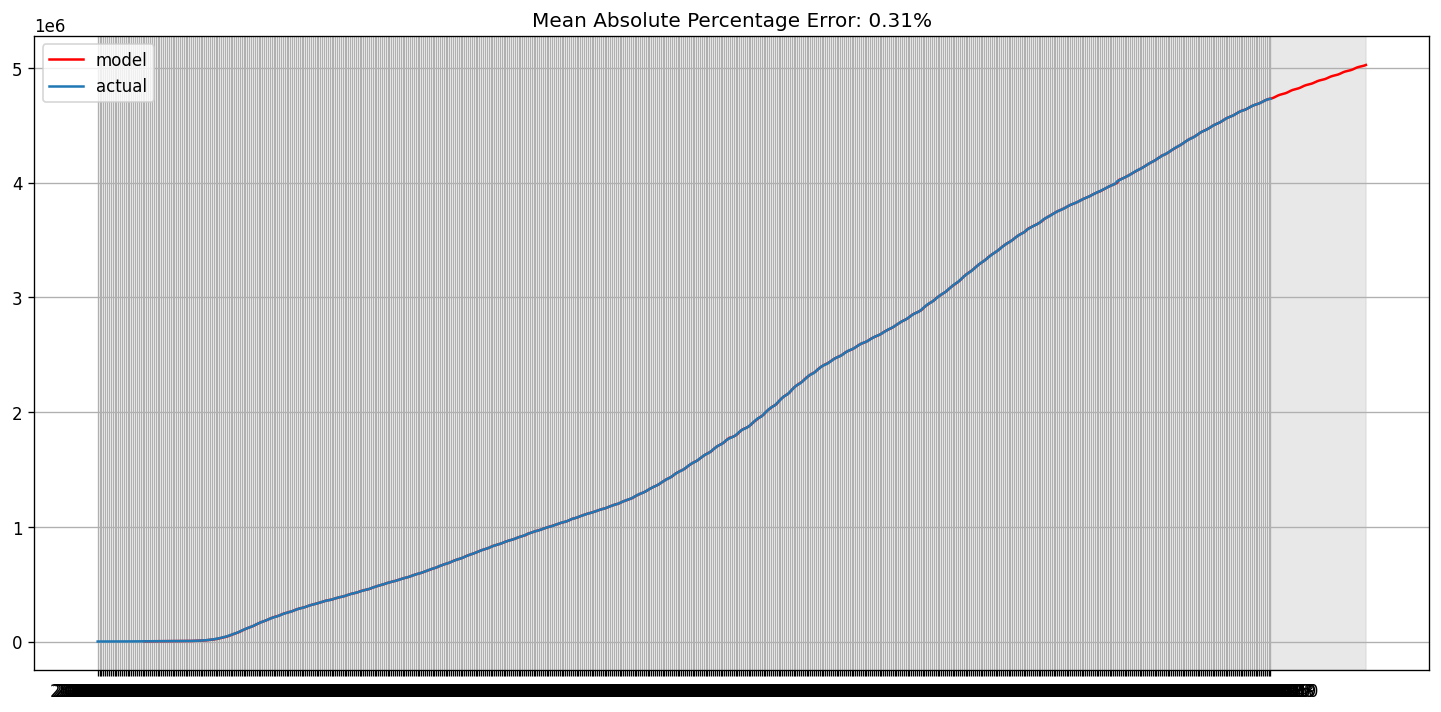

In [207]:
plotSARIMA(death, best_model, 50)




 Things to do 
<!-- - Plot forcast  -->
<!-- - Country wise -->
- Use data with streaming data
- Retraining 
<!-- - select 10 countries -->


# Reuse Trained  Model using Joblib or Pickle in Python

- Model drift
- Examining the feature distribution of training and live data
- updating model parameter
- re-running model selection pipeline across the candidate pool of algorithms 


### Joblib Approach

In [100]:
from sklearn.model_selection  import train_test_split
from sklearn.neural_network import MLPRegressor
import joblib

In [102]:
joblib.dump(mod, "model.pkl") ## Model is saved 

['model.pkl']

## Pickle Approach 

In [103]:
import pickle

## Weather 

https://medium.com/analytics-vidhya/how-to-import-weather-data-into-python-scripts-7e9ff54f6aca

Weather API Documentation: https://www.visualcrossing.com/resources/documentation/weather-api/timeline-weather-api/


Full documentation: https://www.visualcrossing.com/resources/

In [85]:
weather = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history?aggregateHours=24&combinationMethod=aggregate&startDateTime=2021-02-01T00%3A00%3A00&endDateTime=2021-09-20T00%3A00%3A00&maxStations=-1&maxDistance=-1&contentType=json&unitGroup=us&locationMode=array&key=KE4EMTWYEYYSBYEASSNUXKLDF&dataElements=default&locations=Tampa"

In [86]:
json = requests.get(weather).json()

In [87]:
df = pd.json_normalize(json)

In [90]:
df

,errorCode,executionTime,sessionId,message
0,999,-1,,You have exceeded the maximum number of daily ...


In [27]:
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"

In [28]:
CITY = "Tampa"
# Your API key
API_KEY = "bcd0c913b8e474a8dd2219c44d735b3e"

# updating the URL
URL = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

In [29]:
json = requests.get(URL).json()

In [30]:
df = pd.json_normalize(json)
df

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,main.pressure,main.humidity,wind.speed,wind.deg,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000,1632058505,-14400,4174757,Tampa,200,-82.4584,27.9475,...,1017,89,0,0,75,1,6046,US,1632050222,1632094208


Get historical data for added location

http://history.openweathermap.org/data/3.0/history/
result?id={location_id}&start={start_date}&end={end_date}&appid={API key}

In [41]:
URL = "http://history.openweathermap.org/data/3.0/history/Tampa?appid=bcd0c913b8e474a8dd2219c44d735b3e"

In [42]:
json = requests.get(URL).json()

In [43]:
df = pd.json_normalize(json)
df

,cod,message
0,401,Invalid API key. Please see http://openweather...


# Traffic API

data : https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w


ref : https://medium.com/@bhaveshpatelaus/monitoring-real-time-traffic-incidents-using-tom-tom-apis-using-python-in-databricks-and-power-bi-ecbb714366ef

TOMTOM API service 
API_key = 'N1EjK0abAclxyhRH00Naesx4kOoeZb2w'


- Traffic Incidents
- Traffic Flow

In [91]:
apiKey = 'N1EjK0abAclxyhRH00Naesx4kOoeZb2w'


In [96]:
tomtom = "https://api.tomtom.com/traffic/services/5/incidentDetails?bbox=4.8854592519716675%2C52.36934334773164%2C4.897883244144765%2C52.37496348620152&fields=%7Bincidents%7Btype%2Cgeometry%7Btype%2Ccoordinates%7D%2Cproperties%7Bid%2CiconCategory%2CmagnitudeOfDelay%2Cevents%7Bdescription%2Ccode%7D%2CstartTime%2CendTime%2Cfrom%2Cto%2Clength%2Cdelay%2CroadNumbers%2CtimeValidity%2Caci%7BprobabilityOfOccurrence%2CnumberOfReports%2ClastReportTime%7D%2Ctmc%7BcountryCode%2CtableNumber%2CtableVersion%2Cdirection%2Cpoints%7Blocation%2Coffset%7D%7D%7D%7D%7D&key="+apiKey

In [98]:
dict = requests.get(tomtom).json()

In [101]:
dict

{'incidents': [{'type': 'Feature',
   'properties': {'id': 'fe79a514a33b5df116d2fc5182fd3391',
    'iconCategory': 8,
    'magnitudeOfDelay': 4,
    'startTime': '2021-09-10T14:05:30Z',
    'endTime': None,
    'from': 'Hartenstraat / Gasthuismolensteeg',
    'to': 'Raadhuisstraat',
    'length': 120.672,
    'delay': 0,
    'roadNumbers': [],
    'timeValidity': 'present',
    'events': [{'code': 401, 'description': 'Closed'}],
    'aci': None,
    'tmc': None},
   'geometry': {'type': 'LineString',
    'coordinates': [[4.8873053083, 52.3722486223],
     [4.8874353955, 52.3733309378]]}},
  {'type': 'Feature',
   'properties': {'id': 'f39e5891795a07eedd29664d7a0d6b7e',
    'iconCategory': 8,
    'magnitudeOfDelay': 4,
    'startTime': '2021-09-08T03:51:00Z',
    'endTime': None,
    'from': 'Raadhuisstraat',
    'to': 'Gasthuismolensteeg',
    'length': 128.7189931633,
    'delay': 0,
    'roadNumbers': [],
    'timeValidity': 'present',
    'events': [{'code': 401, 'description': 'Clo

In [102]:
df = pd.json_normalize(dict['incidents'])
df

,type,properties.id,properties.iconCategory,properties.magnitudeOfDelay,properties.startTime,properties.endTime,properties.from,properties.to,properties.length,properties.delay,...,properties.events,properties.aci,properties.tmc,geometry.type,geometry.coordinates,properties.tmc.countryCode,properties.tmc.tableNumber,properties.tmc.tableVersion,properties.tmc.direction,properties.tmc.points
0,Feature,fe79a514a33b5df116d2fc5182fd3391,8,4,2021-09-10T14:05:30Z,None,Hartenstraat / Gasthuismolensteeg,Raadhuisstraat,120.672000,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8873053083, 52.3722486223], [4.8874353955,...",NaN,NaN,NaN,NaN,NaN
1,Feature,f39e5891795a07eedd29664d7a0d6b7e,8,4,2021-09-08T03:51:00Z,None,Raadhuisstraat,Gasthuismolensteeg,128.718993,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8885431478, 52.3733242342], [4.8885243723,...",NaN,NaN,NaN,NaN,NaN
2,Feature,82a1d46b1c66caf51d5e827f448ef429,8,4,2021-09-19T10:47:04Z,None,Oude Leliestraat,Raadhuisstraat,143.328390,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8890272865, 52.374578152], [4.8889910767, ...",NaN,NaN,NaN,NaN,NaN
3,Feature,d6416d4049c610e9fcb41e5da4b8753c,8,4,2021-09-19T18:52:30Z,2022-03-31T21:59:00Z,Gasthuismolensteeg / Paleisstraat,Raadhuisstraat,112.673074,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8887778411, 52.3721990347], [4.8888609896,...",NaN,NaN,NaN,NaN,NaN
4,Feature,15050ace2431ea1732a7151af0b0e2a7,8,4,2021-08-17T07:56:30Z,2022-03-31T21:59:00Z,Raadhuisstraat,Raadhuisstraat,12.565129,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8891332338, 52.3731887798], [4.8891667614,...",NaN,NaN,NaN,NaN,NaN
5,Feature,45f9ded6e59cd92e652e65841f863638,8,4,2021-08-08T22:00:00Z,2022-02-01T22:59:00Z,Nassaukade - s100 (De Clercqstraat/v100-CR3),Nieuwezijds Voorburgwal (Raadhuisstraat/v100-CR3),151.985547,0,...,"[{'code': 24, 'description': 'Bridge closed'},...",None,NaN,LineString,"[[4.8874353955, 52.3733309378], [4.8885029147,...",8,17,9.7,positive,"[{'location': 55330, 'offset': 0}, {'location'..."
6,Feature,5ac2a06513a1b4ed9760619577e3368b,8,4,2021-09-15T13:04:00Z,None,Spuistraat,Nieuwezijds Voorburgwal,39.222314,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8897166142, 52.3715780851], [4.8902865837,...",NaN,NaN,NaN,NaN,NaN


In [103]:
# Traffice flow

link = "https://api.tomtom.com/traffic/services/4/flowSegmentData/relative0/10/json?point=27.950575%2C-82.457176&key="+apiKey


In [104]:
json = requests.get(link).json()

In [105]:
json

{'flowSegmentData': {'frc': 'FRC4',
  'currentSpeed': 19,
  'freeFlowSpeed': 19,
  'currentTravelTime': 117,
  'freeFlowTravelTime': 117,
  'confidence': 1,
  'roadClosure': False,
  'coordinates': {'coordinate': [{'latitude': 27.953028848184605,
     'longitude': -82.4573761835828},
    {'latitude': 27.95285181828674, 'longitude': -82.45729839952133},
    {'latitude': 27.952702997445424, 'longitude': -82.45723402650496},
    {'latitude': 27.9526023766708, 'longitude': -82.45718977005622},
    {'latitude': 27.95246288458089, 'longitude': -82.45712807924885},
    {'latitude': 27.952280522834894, 'longitude': -82.4570489540829},
    {'latitude': 27.952111562144104, 'longitude': -82.45697251112595},
    {'latitude': 27.95191172617421, 'longitude': -82.45688265712393},
    {'latitude': 27.95158179980664, 'longitude': -82.45673379452359},
    {'latitude': 27.9515335250381, 'longitude': -82.45671233685144},
    {'latitude': 27.951481252028266, 'longitude': -82.4566868558658},
    {'latitude'

In [109]:
df = pd.json_normalize(json['flowSegmentData'])
df

,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure,@version,coordinates.coordinate
0,FRC4,19,19,117,117,1,False,traffic-service-flow 1.0.018,"[{'latitude': 27.953028848184605, 'longitude':..."
